**Step 1 : Import**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Flatten, Dense, Conv2D, MaxPool2D, Dropout
from tensorflow.keras.optimizers import Adam
from google.colab.patches import cv2_imshow
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt

**Step : Load Dataset**

In [ ]:
imagePaths = 'Dataset/'
label_list = ['Daun_Jambu_Biji','Daun_Lidah_Buaya']
data = []
labels = []

In [ ]:
for label in label_list:
    for imagePath in glob.glob(imagePaths+label+'/*.jpg'):

        image = cv2.imread(imagePath)
        image = cv2.resize(image, (32, 32))
        data.append(image)
        labels.append(label)

In [ ]:
np.array(data).shape

(100, 32, 32, 3)

**Step 3 : Data Processing**

In [ ]:
data = np.array(data, dtype='float')
labels = np.array(labels)

In [ ]:
print(labels)

['Daun_Jambu_Biji' 'Daun_Jambu_Biji' 'Daun_Jambu_Biji' 'Daun_Jambu_Biji'
 'Daun_Jambu_Biji' 'Daun_Jambu_Biji' 'Daun_Jambu_Biji' 'Daun_Jambu_Biji'
 'Daun_Jambu_Biji' 'Daun_Jambu_Biji' 'Daun_Jambu_Biji' 'Daun_Jambu_Biji'
 'Daun_Jambu_Biji' 'Daun_Jambu_Biji' 'Daun_Jambu_Biji' 'Daun_Jambu_Biji'
 'Daun_Jambu_Biji' 'Daun_Jambu_Biji' 'Daun_Jambu_Biji' 'Daun_Jambu_Biji'
 'Daun_Jambu_Biji' 'Daun_Jambu_Biji' 'Daun_Jambu_Biji' 'Daun_Jambu_Biji'
 'Daun_Jambu_Biji' 'Daun_Jambu_Biji' 'Daun_Jambu_Biji' 'Daun_Jambu_Biji'
 'Daun_Jambu_Biji' 'Daun_Jambu_Biji' 'Daun_Jambu_Biji' 'Daun_Jambu_Biji'
 'Daun_Jambu_Biji' 'Daun_Jambu_Biji' 'Daun_Jambu_Biji' 'Daun_Jambu_Biji'
 'Daun_Jambu_Biji' 'Daun_Jambu_Biji' 'Daun_Jambu_Biji' 'Daun_Jambu_Biji'
 'Daun_Jambu_Biji' 'Daun_Jambu_Biji' 'Daun_Jambu_Biji' 'Daun_Jambu_Biji'
 'Daun_Jambu_Biji' 'Daun_Jambu_Biji' 'Daun_Jambu_Biji' 'Daun_Jambu_Biji'
 'Daun_Jambu_Biji' 'Daun_Jambu_Biji' 'Daun_Lidah_Buaya' 'Daun_Lidah_Buaya'
 'Daun_Lidah_Buaya' 'Daun_Lidah_Buaya' 'Daun_Lida

In [ ]:
lb = LabelEncoder()
labels = lb.fit_transform(labels)

In [ ]:
print(labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


**Step 4 : Split Dataset**

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

In [ ]:
print('Ukuran data train =', x_train.shape)
print('Ukuran data test =', x_test.shape)

Ukuran data train = (80, 32, 32, 3)
Ukuran data test = (20, 32, 32, 3)


**Step 5 : Build CNN**

In [ ]:
model = Sequential()

model.add(InputLayer(input_shape=[32,32,3]))
model.add(Conv2D(filters=32, kernel_size=2, strides=1, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, padding='same'))
model.add(Conv2D(filters=50, kernel_size=2, strides=1, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, padding='same'))
model.add(Dropout(0.25))
model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 32, 32, 32)        416       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 16, 16, 50)        6450      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 8, 8, 50)         0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 8, 8, 50)          0         
                                                                 
 flatten_2 (Flatten)         (None, 3200)             

In [ ]:
lr = 0.001
max_epochs = 100
opt_funct = Adam(learning_rate=lr)

In [ ]:
model.compile(loss = 'binary_crossentropy', 
              optimizer = opt_funct, 
              metrics = ['accuracy'])

**Step 6 : Train Model**

In [ ]:
H = model.fit(x_train, y_train, validation_data=(x_test, y_test), 
          epochs=max_epochs, batch_size=32)

Epoch 1/100
3/3 [==============================] - 1s 111ms/step - loss: 9.9336e-18 - accuracy: 1.0000 - val_loss: 3.5130e-23 - val_accuracy: 1.0000
Epoch 2/100
3/3 [==============================] - 0s 51ms/step - loss: 1.0757e-20 - accuracy: 1.0000 - val_loss: 3.5130e-23 - val_accuracy: 1.0000
Epoch 3/100
3/3 [==============================] - 0s 58ms/step - loss: 3.0321e-15 - accuracy: 1.0000 - val_loss: 3.5130e-23 - val_accuracy: 1.0000
Epoch 4/100
3/3 [==============================] - 0s 52ms/step - loss: 1.5992e-13 - accuracy: 1.0000 - val_loss: 3.5130e-23 - val_accuracy: 1.0000
Epoch 5/100
3/3 [==============================] - 0s 57ms/step - loss: 1.4709e-20 - accuracy: 1.0000 - val_loss: 3.5130e-23 - val_accuracy: 1.0000
Epoch 6/100
3/3 [==============================] - 0s 53ms/step - loss: 8.3689e-14 - accuracy: 1.0000 - val_loss: 3.5130e-23 - val_accuracy: 1.0000
Epoch 7/100
3/3 [==============================] - 0s 51ms/step - loss: 1.7777e-11 - accuracy: 1.0000 - val_los

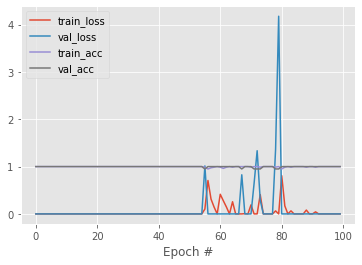

In [ ]:
N = np.arange(0, max_epochs)
plt.style.use("ggplot")
plt.figure()
plt.plot(N, H.history["loss"], label="train_loss")
plt.plot(N, H.history["val_loss"], label="val_loss")
plt.plot(N, H.history["accuracy"], label="train_acc")
plt.plot(N, H.history["val_accuracy"], label="val_acc")
plt.xlabel("Epoch #")
plt.legend()
plt.show()

**Step 7 : Evaluate the Model**

In [ ]:
predictions = model.predict(x_test, batch_size=32)
target = (predictions > 0.5).astype(np.int)
print(classification_report(y_test, target, target_names=label_list))

                  precision    recall  f1-score   support

 Daun_Jambu_Biji       1.00      1.00      1.00        12
Daun_Lidah_Buaya       1.00      1.00      1.00         8

        accuracy                           1.00        20
       macro avg       1.00      1.00      1.00        20
    weighted avg       1.00      1.00      1.00        20



In [ ]:
queryPath = imagePaths+'002.jpg'
originalImg = cv2.imread(queryPath)
cloneImg = originalImg.copy()
originalImg = cv2.resize(originalImg, (32, 32))
q = []
q.append(originalImg)
q = np.array(q, dtype='float') / 255.0

q_pred = model.predict(q)
print(q_pred)

[[0.37748975]]


In [ ]:
if q_pred<=0.5 :
    target = "Jambu Biji"
else :
    target = "Lidah Buaya"
text = "{}".format(target)
cv2.putText(output, text, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)

array([[[167, 169, 169],
        [167, 169, 169],
        [169, 171, 172],
        ...,
        [205, 209, 210],
        [205, 210, 211],
        [205, 210, 211]],

       [[168, 170, 170],
        [169, 171, 171],
        [170, 172, 173],
        ...,
        [206, 210, 211],
        [205, 210, 211],
        [205, 210, 211]],

       [[162, 164, 164],
        [163, 165, 165],
        [166, 168, 169],
        ...,
        [206, 210, 211],
        [206, 210, 211],
        [206, 210, 211]],

       ...,

       [[161, 165, 166],
        [157, 161, 162],
        [156, 160, 161],
        ...,
        [213, 215, 216],
        [214, 216, 217],
        [213, 215, 216]],

       [[159, 164, 165],
        [157, 162, 163],
        [157, 161, 162],
        ...,
        [213, 215, 216],
        [211, 215, 216],
        [210, 214, 215]],

       [[161, 166, 167],
        [160, 165, 166],
        [160, 164, 165],
        ...,
        [214, 216, 217],
        [211, 215, 216],
        [209, 213, 214]]

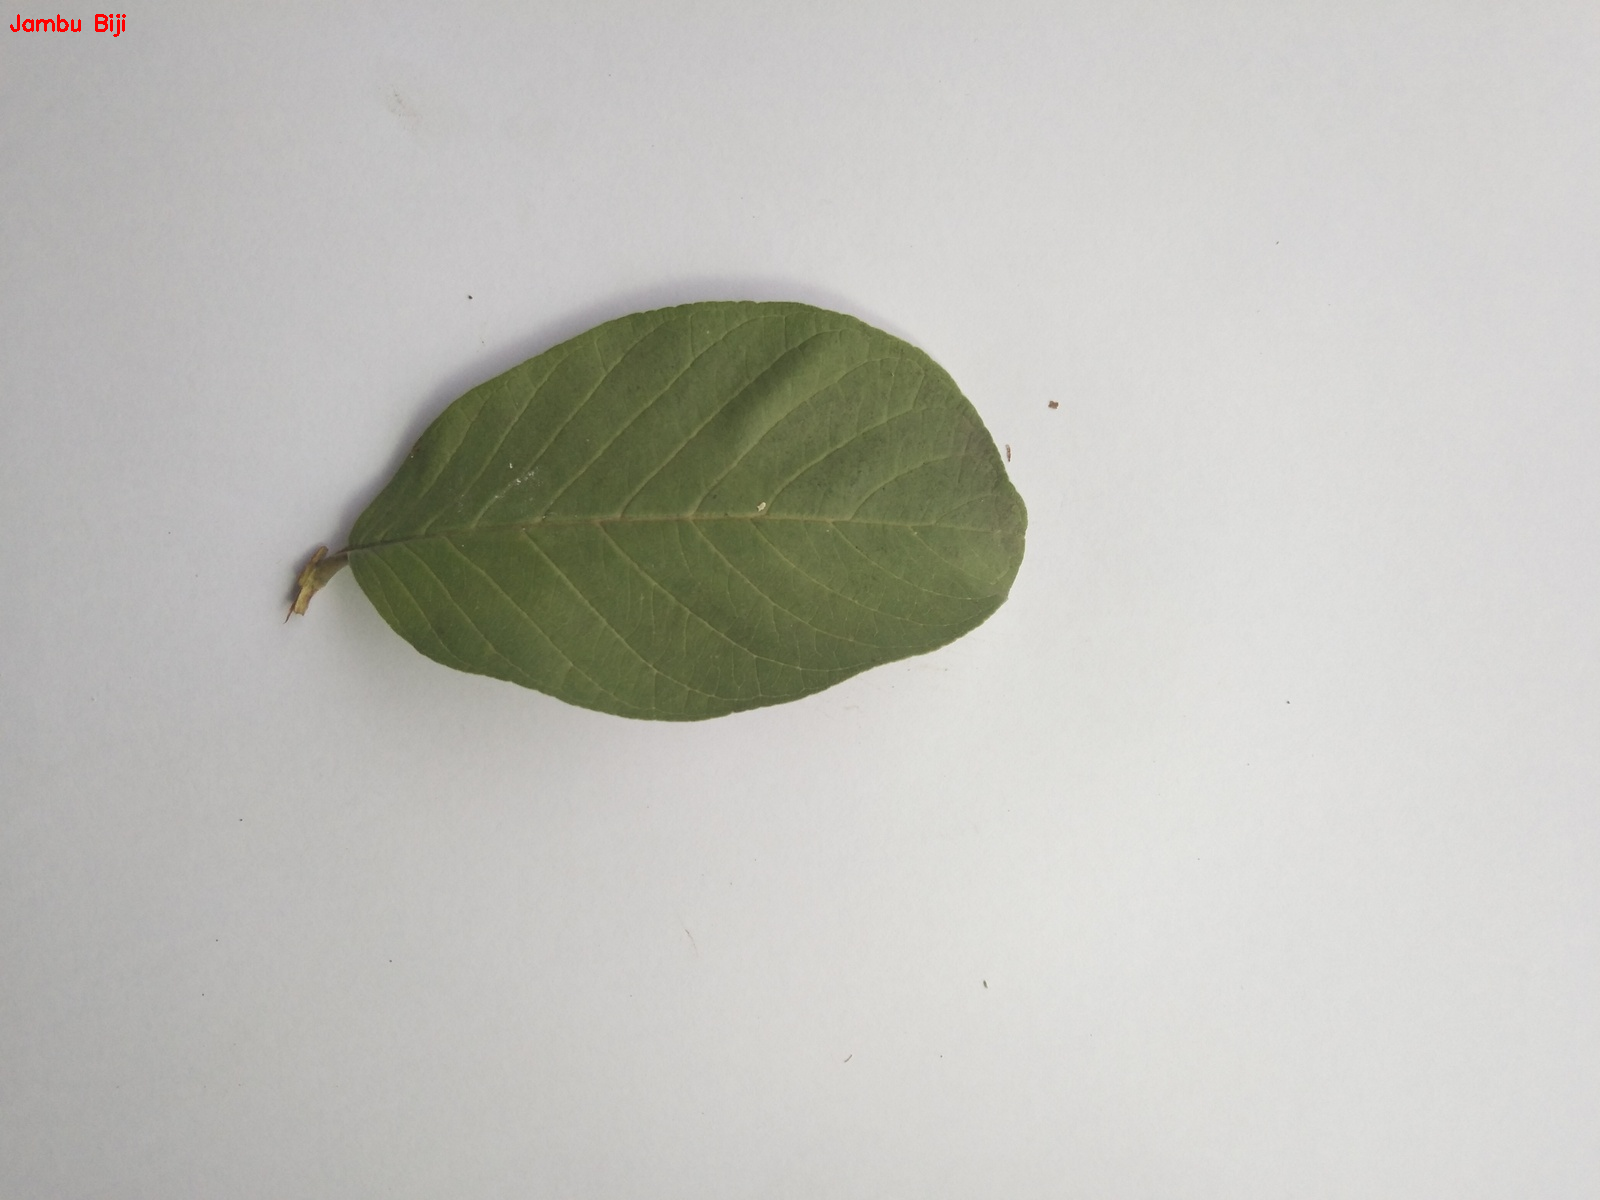

In [ ]:
cv2_imshow(output)